In [5]:
import pandas as pd
import numpy as np
import pickle
import scipy.sparse as sparse

In [3]:
# Load artist links
artist_links_file = open("../data/artists/artist_links.pickle", "rb")
artist_links = pickle.load(artist_links_file)
artist_links_file.close()

# Combine all artists
artists = pd.read_csv('../data/artists/artist_info.csv')

adjacency = np.zeros((artists.shape[0], artists.shape[0]))
idToIndexMap = {}

# Since the artist links actually use the Spotify ID and not the index in the adjacency matrix,
# we need to map the spotify id to the index
for index, row in artists.iterrows():
    idToIndexMap[row['id']] = index

# Loop through all artists fill adjacency matrix with one in case of a relation
for artist_id, rel_artists in artist_links.items():
    artist_index = idToIndexMap[artist_id]
    for related_artist in rel_artists:
        related_artist_index = idToIndexMap[related_artist]
        adjacency[artist_index, related_artist_index] = 1

# Save id to index map for later
id_to_index_file = open("../data/artists/id_to_index.pickle", "wb")
pickle.dump(idToIndexMap, id_to_index_file)
id_to_index_file.close()

print('Size of adjacency matrix: %d x %d' % adjacency.shape)
print(adjacency)

Size of adjacency matrix: 26005 x 26005
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
sparse_adj = sparse.csc_matrix(adjacency)
print('The adjacency matrix has %d non-zero elements, this is equivalent to the number of edges' % sparse_adj.nnz)

The adjacency matrix has 147267 non-zero elements, this is equivalent to the number of edges


In [7]:
# Add indegree and outdegree
degrees = adjacency @ np.ones(adjacency.shape[0]) + np.ones(adjacency.shape[0]).T @ adjacency

print('Minimum degree %d' % min(degrees))
print('Maximum degree %d' % max(degrees))
print('Average degree: %f' % np.mean(degrees))
print('Std of degree: %f. This number is quite high!' % np.std(degrees))

Minimum degree 0
Maximum degree 116
Average degree: 11.326053
Std of degree: 14.901149. This number is quite high!


Text(0, 0.5, '#artists having degree = k')

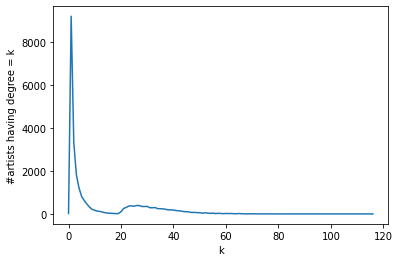

In [8]:
from itertools import groupby
import matplotlib.pyplot as plt


# Util function to return the distribution of values
def dist(values):
    values = sorted(values)

    # First make dist
    distribution = [(key, len(list(group))) for key, group in groupby(values)]

    return [x[0] for x in distribution], [x[1] for x in distribution]


degree_dist_x, degree_dist_y = dist(degrees)

plt.plot(degree_dist_x, degree_dist_y)
plt.xlabel("k")
plt.ylabel("#artists having degree = k")

Text(0, 0.5, 'log(#artists) having degree = k')

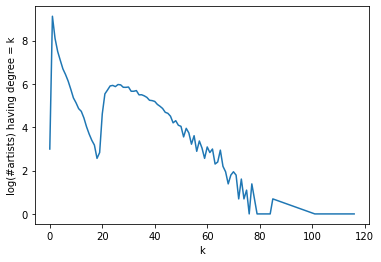

In [9]:
plt.plot(degree_dist_x, np.log(degree_dist_y))
plt.xlabel("k")
plt.ylabel("log(#artists) having degree = k")

Text(0.5, 1.0, 'Cumulative distribution of degrees')

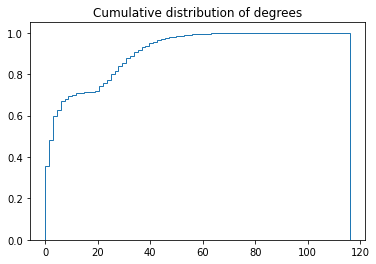

In [11]:
plt.hist(degrees, cumulative=True, density=True, bins='auto', histtype='step')
plt.title('Cumulative distribution of degrees')

In [12]:
density_adj = sparse_adj.nnz / (sparse_adj.shape[0] * (sparse_adj.shape[0] - 1))

print('The density is equal to %f' % density_adj)

The density is equal to 0.000218
